# K Nearest Neighbors Exercises

## Introduction

We will be using customer churn data from the telecom industry for the first week's exercises. The data file is called 
`Orange_Telecom_Churn_Data.csv`. We will load this data together, do some preprocessing, and use K-nearest neighbors to predict customer churn based on account characteristics.

In [1]:
from __future__ import print_function
import os
data_path = ['..', '..', 'data']


## Question 1

* Begin by importing the data. Examine the columns and data.
* Notice that the data contains a state, area code, and phone number. Do you think these are good features to use when building a machine learning model? Why or why not? 

We will not be using them, so they can be dropped from the data.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
data =pd.read_csv("./Orange_Telecom_Churn_Data.csv")
data.head()

state  account_length  area_code phone_number intl_plan voice_mail_plan  \
0    KS             128        415     382-4657        no             yes   
1    OH             107        415     371-7191        no             yes   
2    NJ             137        415     358-1921        no              no   
3    OH              84        408     375-9999       yes              no   
4    OK              75        415     330-6626       yes              no   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total_day_charge  ...  total_eve_calls  total_eve_charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total_night_minutes  total_night_calls  total_night_charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   number_customer_service_calls  churned  
0                              1    False  
1                              1    False  
2                              0    False  
3                              2    False  
4                              3    False  

[5 rows x 21 columns]

In [4]:
data.drop(data[['state','area_code','phone_number']], axis=1)
data.head(5)

state  account_length  area_code phone_number intl_plan voice_mail_plan  \
0    KS             128        415     382-4657        no             yes   
1    OH             107        415     371-7191        no             yes   
2    NJ             137        415     358-1921        no              no   
3    OH              84        408     375-9999       yes              no   
4    OK              75        415     330-6626       yes              no   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total_day_charge  ...  total_eve_calls  total_eve_charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total_night_minutes  total_night_calls  total_night_charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total_intl_minutes  total_intl_calls  total_intl_charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   number_customer_service_calls  churned  
0                              1    False  
1                              1    False  
2                              0    False  
3                              2    False  
4                              3    False  

[5 rows x 21 columns]

In [5]:
del data['state']
del data['area_code']
del data['phone_number']

data.tail()

account_length intl_plan voice_mail_plan  number_vmail_messages  \
4995              50        no             yes                     40   
4996             152        no              no                      0   
4997              61        no              no                      0   
4998             109        no              no                      0   
4999              86        no             yes                     34   

      total_day_minutes  total_day_calls  total_day_charge  total_eve_minutes  \
4995              235.7              127             40.07              223.0   
4996              184.2               90             31.31              256.8   
4997              140.6               89             23.90              172.8   
4998              188.8               67             32.10              171.7   
4999              129.4              102             22.00              267.1   

      total_eve_calls  total_eve_charge  total_night_minutes  \
4995              126             18.96                297.5   
4996               73             21.83                213.6   
4997              128             14.69                212.4   
4998               92             14.59                224.4   
4999              104             22.70                154.8   

      total_night_calls  total_night_charge  total_intl_minutes  \
4995                116               13.39                 9.9   
4996                113                9.61                14.7   
4997                 97                9.56                13.6   
4998                 89               10.10                 8.5   
4999                100                6.97                 9.3   

      total_intl_calls  total_intl_charge  number_customer_service_calls  \
4995                 5               2.67                              2   
4996                 2               3.97                              3   
4997                 4               3.67                              1   
4998                 6               2.30                              0   
4999                16               2.51                              0   

      churned  
4995    False  
4996     True  
4997    False  
4998    False  
4999    False

## Question 2

* Notice that some of the columns are categorical data and some are floats. These features will need to be numerically encoded using one of the methods from the lecture.
* Finally, remember from the lecture that K-nearest neighbors requires scaled data. Scale the data using one of the scaling methods discussed in the lecture.

In [6]:
data.columns

Index([u'account_length', u'intl_plan', u'voice_mail_plan',
       u'number_vmail_messages', u'total_day_minutes', u'total_day_calls',
       u'total_day_charge', u'total_eve_minutes', u'total_eve_calls',
       u'total_eve_charge', u'total_night_minutes', u'total_night_calls',
       u'total_night_charge', u'total_intl_minutes', u'total_intl_calls',
       u'total_intl_charge', u'number_customer_service_calls', u'churned'],
      dtype='object')

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing



In [8]:
#Encoding the categorical data into numerical data

encoder =preprocessing.LabelEncoder()
# encoded = encoder.fit(data['churned'])
# encoded.classes_
# labels_to_encode=data[['churned','int_plan','voice_mail_messages']]




data['churned']=LabelEncoder().fit_transform(data['churned'])
data['intl_plan']=LabelEncoder().fit_transform(data['intl_plan'])
data['voice_mail_plan']=LabelEncoder().fit_transform(data['voice_mail_plan'])


data.head()

account_length  intl_plan  voice_mail_plan  number_vmail_messages  \
0             128          0                1                     25   
1             107          0                1                     26   
2             137          0                0                      0   
3              84          1                0                      0   
4              75          1                0                      0   

   total_day_minutes  total_day_calls  total_day_charge  total_eve_minutes  \
0              265.1              110             45.07              197.4   
1              161.6              123             27.47              195.5   
2              243.4              114             41.38              121.2   
3              299.4               71             50.90               61.9   
4              166.7              113             28.34              148.3   

   total_eve_calls  total_eve_charge  total_night_minutes  total_night_calls  \
0               99             16.78                244.7                 91   
1              103             16.62                254.4                103   
2              110             10.30                162.6                104   
3               88              5.26                196.9                 89   
4              122             12.61                186.9                121   

   total_night_charge  total_intl_minutes  total_intl_calls  \
0               11.01                10.0                 3   
1               11.45                13.7                 3   
2                7.32                12.2                 5   
3                8.86                 6.6                 7   
4                8.41                10.1                 3   

   total_intl_charge  number_customer_service_calls  churned  
0               2.70                              1        0  
1               3.70                              1        0  
2               3.29                              0        0  
3               1.78                              2        0  
4               2.73                              3        0

In [9]:
#Scaling the data
#example
# scores=[2000,22,23]
# score_df=pd.DataFrame(scores)
# std_scaler=preprocessing.MinMaxScaler()
# scaled_scores=std_scaler.fit_transform(score_df)
# scaled_scores

def myScale(data):
    std_scaler=preprocessing.MinMaxScaler()
    scaled_scores=std_scaler.fit_transform(data)
    
    return scaled_scores




In [10]:
newDf=pd.DataFrame(myScale(data),columns=data.columns)
newDf.head()

c:\python27\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


account_length  intl_plan  voice_mail_plan  number_vmail_messages  \
0        0.524793        0.0              1.0               0.480769   
1        0.438017        0.0              1.0               0.500000   
2        0.561983        0.0              0.0               0.000000   
3        0.342975        1.0              0.0               0.000000   
4        0.305785        1.0              0.0               0.000000   

   total_day_minutes  total_day_calls  total_day_charge  total_eve_minutes  \
0           0.754196         0.666667          0.754183           0.542755   
1           0.459744         0.745455          0.459672           0.537531   
2           0.692461         0.690909          0.692436           0.333242   
3           0.851778         0.430303          0.851740           0.170195   
4           0.474253         0.684848          0.474230           0.407754   

   total_eve_calls  total_eve_charge  total_night_minutes  total_night_calls  \
0         0.582353          0.542866             0.619494           0.520000   
1         0.605882          0.537690             0.644051           0.588571   
2         0.647059          0.333225             0.411646           0.594286   
3         0.517647          0.170171             0.498481           0.508571   
4         0.717647          0.407959             0.473165           0.691429   

   total_night_charge  total_intl_minutes  total_intl_calls  \
0            0.619584               0.500              0.15   
1            0.644344               0.685              0.15   
2            0.411930               0.610              0.25   
3            0.498593               0.330              0.35   
4            0.473270               0.505              0.15   

   total_intl_charge  number_customer_service_calls  churned  
0           0.500000                       0.111111      0.0  
1           0.685185                       0.111111      0.0  
2           0.609259                       0.000000      0.0  
3           0.329630                       0.222222      0.0  
4           0.505556                       0.333333      0.0

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

## Question 3

* Separate the feature columns (everything except `churned`) from the label (`churned`). This will create two tables.
* Fit a K-nearest neighbors model with a value of `k=3` to this data and predict the outcome on the same data.

In [15]:
# input_features=['account_length','intl_plan']
# output=['churned']

# X =pd.DataFrame(input_features)
# y=pd.DataFrame(output) df.loc[:, :'bar']


# X = data.loc[:,['account_length',
#        'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
#        'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
#        'total_eve_charge', 'total_night_minutes', 'total_night_calls',
#        'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
#        'total_intl_charge', 'number_customer_service_calls']]
# y = data.loc[:,['churned']]
# y.head()


X=newDf[['account_length','intl_plan', 'voice_mail_plan',
        'number_vmail_messages', 'total_day_minutes', 'total_day_calls',
       'total_day_charge', 'total_eve_minutes', 'total_eve_calls',
        'total_eve_charge', 'total_night_minutes', 'total_night_calls',
        'total_night_charge', 'total_intl_minutes', 'total_intl_calls',
        'total_intl_charge', 'number_customer_service_calls']]
y = newDf['churned']


In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.4,random_state=0)

clf=KNeighborsClassifier(n_neighbors=3)

# fitting the classifier on the training data
clf.fit(X_train,y_train)



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [19]:
# predicting on the test data
predictions=clf.predict(X_test)
pred_df=pd.DataFrame(predictions,columns=['Pred'])
comparison_df=pd.DataFrame(pred_df,y_test)
print(comparison_df.head())


         Pred
churned      
0.0       0.0
0.0       0.0
0.0       0.0
1.0       0.0
0.0       0.0


In [20]:
# Evaluation
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))

[[1675   48]
 [ 168  109]]


In [127]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.91      0.97      0.94      1723
         1.0       0.69      0.39      0.50       277

   micro avg       0.89      0.89      0.89      2000
   macro avg       0.80      0.68      0.72      2000
weighted avg       0.88      0.89      0.88      2000



In [21]:
#Finding the best value of K

error=[]
for i in range(1,40):
    clf=KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    pred_i=clf.predict(X_test)
    error.append(np.mean(pred_i != y_test))


Text(0.5,1,'Variation of k value with error rate ')

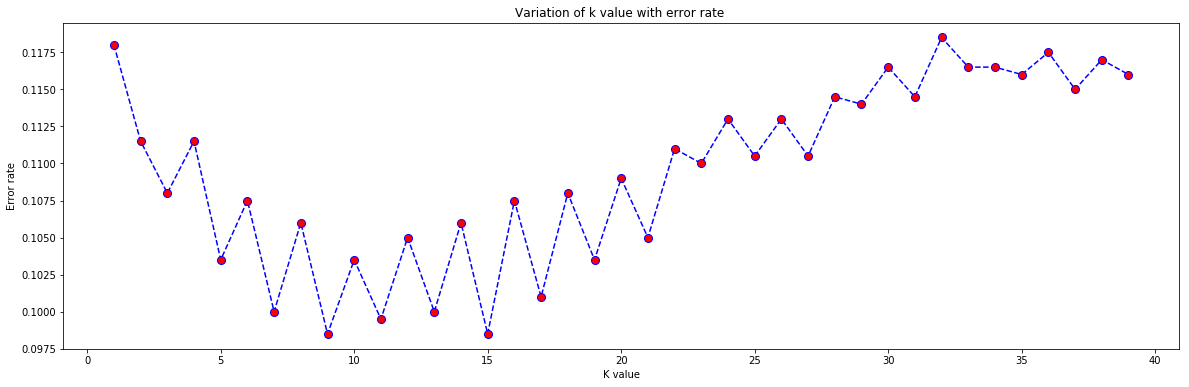

In [155]:
    
    plt.figure(figsize=(20,6))
    plt.plot(range(1,40),error,color='blue',linestyle='dashed', marker='o',markerfacecolor='red', markersize='8')
    plt.xlabel('K value')
    plt.ylabel('Error rate')
    plt.title('Variation of k value with error rate ')

## Question 4

Ways to measure error haven't been discussed in class yet, but accuracy is an easy one to understand--it is simply the percent of labels that were correctly predicted (either true or false). 

* Write a function to calculate accuracy using the actual and predicted labels.
* Using the function, calculate the accuracy of this K-nearest neighbors model on the data.

In [22]:
def accuracy_score(X_test,y_test):
    
    accuracy =clf.score(X_test,y_test)* 100
    
    return print('We achieved {:.1f} % accuracy'.format(accuracy))
    

In [142]:
accuracy_score(X_test,y_test)

We achieved 89.6 % accuracy


## Question 5

* Fit the K-nearest neighbors model again with `n_neighbors=3` but this time use distance for the weights. Calculate the accuracy using the function you created above. 
* Fit another K-nearest neighbors model. This time use uniform weights but set the power parameter for the Minkowski distance metric to be 1 (`p=1`) i.e. Manhattan Distance.

When weighted distances are used for part 1 of this question, a value of 1.0 should be returned for the accuracy. Why do you think this is? *Hint:* we are predicting on the data and with KNN the model *is* the data. We will learn how to avoid this pitfall in the next lecture.

In [143]:
clf=KNeighborsClassifier(n_neighbors=3, weights='distance')
clf.fit(X_train,y_train)
clf.predict(X_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [144]:
accuracy_score(X_test,y_test)

We achieved 89.2 % accuracy


In [145]:
clf=KNeighborsClassifier(n_neighbors=3, weights='uniform',p=1)
clf.fit(X_train,y_train)
clf.predict(X_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [146]:
accuracy_score(X_test,y_test)

We achieved 90.5 % accuracy


## Question 6

* Fit a K-nearest neighbors model using values of `k` (`n_neighbors`) ranging from 1 to 20. Use uniform weights (the default). The coefficient for the Minkowski distance (`p`) can be set to either 1 or 2--just be consistent. Store the accuracy and the value of `k` used from each of these fits in a list or dictionary.
* Plot (or view the table of) the `accuracy` vs `k`. What do you notice happens when `k=1`? Why do you think this is? *Hint:* it's for the same reason discussed above.

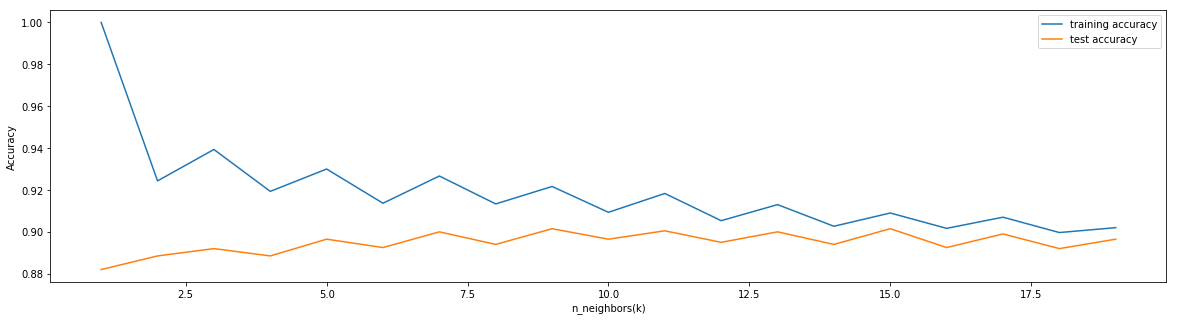

In [147]:
training_accuracy = []
test_accuracy = []
neighbors_settings = range(1, 20)
fig, ax = plt.subplots(figsize=(20,5))
for n_neighbors in neighbors_settings:
# build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors,p=2)
    clf.fit(X_train, y_train)
    
# record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
# record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))

plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors(k)")
plt.legend()